## 여기 코드는 버젼 추가하지 않아도 됩니다.

In [7]:
import pandas as pd # 데이터 프레임
import numpy as np # 
import re # 정규표현식
import os # wd 변경

import seaborn as sns # 시각화

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)

In [9]:
os.chdir('D:/5 Project/GitHub/CollaborationWork/jyeon94/Learning_Spoons_Second_Project/')

In [10]:
def reColindex(df, ori, fix):
    cols = df.columns.tolist()
    tmp = cols[fix - 1]
    del cols[fix - 1]
    cols.insert(ori - 1, tmp)
    return df[cols]

In [11]:
df = pd.read_csv('날씨_시계열_데이터.csv',encoding='euc-kr')

In [12]:
df.head()

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,강원 강릉시,632132,옥천동,2014-01-01,0.009042,0.654167,0.019458,0.012000,82.333333,NaN
1,강원 강릉시,632132,옥천동,2014-01-02,0.007167,0.591667,0.016333,0.013667,44.791667,NaN
2,강원 강릉시,632132,옥천동,2014-01-03,0.009750,0.770833,0.019542,0.016458,63.083333,NaN
3,강원 강릉시,632132,옥천동,2014-01-04,0.006875,0.795833,0.011708,0.016000,40.916667,NaN
4,강원 강릉시,632132,옥천동,2014-01-05,0.007292,0.745833,0.012042,0.012708,26.041667,NaN


In [13]:
df['연도'] = df['측정일시'].str.split("-").str.get(0)
df['날짜'] = df['측정일시'].str.split("-").str.get(1) + "-" + df['측정일시'].str.split("-").str.get(2)

In [14]:
dic_Sido = {"서울" : "서울특별시",
            "부산" : "부산광역시",
            "대구" : "대구광역시",
            "인천" : "인천광역시",
            "광주" : "광주광역시",
            "대전" : "대전광역시",
            "울산" : "울산광역시",
            "세종" : "세종특별시",
            "경기" : "경기도",
            "강원" : "강원도",
            "충북" : "충청북도",
            "충남" : "충청남도",
            "전북" : "전라북도",
            "전남" : "전라남도",
            "경북" : "경상북도",
            "경남" : "경상남도",
            "제주" : "제주도"}

df['도'] = df["지역"].str.split(" ").str.get(0)

In [15]:
df["도"] = df["도"].map(dic_Sido)

In [16]:
df['월'] = df['날짜'].str.split("-").str.get(0)
df

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,연도,날짜,도,월
0,강원 강릉시,632132,옥천동,2014-01-01,0.009042,0.654167,0.019458,0.012000,82.333333,NaN,2014,01-01,강원도,01
1,강원 강릉시,632132,옥천동,2014-01-02,0.007167,0.591667,0.016333,0.013667,44.791667,NaN,2014,01-02,강원도,01
2,강원 강릉시,632132,옥천동,2014-01-03,0.009750,0.770833,0.019542,0.016458,63.083333,NaN,2014,01-03,강원도,01
3,강원 강릉시,632132,옥천동,2014-01-04,0.006875,0.795833,0.011708,0.016000,40.916667,NaN,2014,01-04,강원도,01
4,강원 강릉시,632132,옥천동,2014-01-05,0.007292,0.745833,0.012042,0.012708,26.041667,NaN,2014,01-05,강원도,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730516,충북 충주시,633123,칠금동,2019-09-26,0.003333,0.670833,0.014667,0.021542,33.750000,14.875000,2019,09-26,충청북도,09
730517,충북 충주시,633123,칠금동,2019-09-27,0.003667,0.645833,0.015375,0.026292,29.958333,9.666667,2019,09-27,충청북도,09
730518,충북 충주시,633123,칠금동,2019-09-28,0.003417,0.666667,0.018625,0.023917,39.250000,19.541667,2019,09-28,충청북도,09
730519,충북 충주시,633123,칠금동,2019-09-29,0.003042,0.587500,0.025792,0.018667,43.583333,26.541667,2019,09-29,충청북도,09


In [17]:
reColindex(df, 14, 13)

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,연도,날짜,월,도
0,강원 강릉시,632132,옥천동,2014-01-01,0.009042,0.654167,0.019458,0.012000,82.333333,NaN,2014,01-01,01,강원도
1,강원 강릉시,632132,옥천동,2014-01-02,0.007167,0.591667,0.016333,0.013667,44.791667,NaN,2014,01-02,01,강원도
2,강원 강릉시,632132,옥천동,2014-01-03,0.009750,0.770833,0.019542,0.016458,63.083333,NaN,2014,01-03,01,강원도
3,강원 강릉시,632132,옥천동,2014-01-04,0.006875,0.795833,0.011708,0.016000,40.916667,NaN,2014,01-04,01,강원도
4,강원 강릉시,632132,옥천동,2014-01-05,0.007292,0.745833,0.012042,0.012708,26.041667,NaN,2014,01-05,01,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730516,충북 충주시,633123,칠금동,2019-09-26,0.003333,0.670833,0.014667,0.021542,33.750000,14.875000,2019,09-26,09,충청북도
730517,충북 충주시,633123,칠금동,2019-09-27,0.003667,0.645833,0.015375,0.026292,29.958333,9.666667,2019,09-27,09,충청북도
730518,충북 충주시,633123,칠금동,2019-09-28,0.003417,0.666667,0.018625,0.023917,39.250000,19.541667,2019,09-28,09,충청북도
730519,충북 충주시,633123,칠금동,2019-09-29,0.003042,0.587500,0.025792,0.018667,43.583333,26.541667,2019,09-29,09,충청북도


In [18]:
df = df.groupby(["도", "측정소코드", "측정소명", "연도", "월"]).mean().reset_index().drop("측정소코드", axis = 1)
df.head()

,도,측정소명,연도,월,SO2,CO,O3,NO2,PM10,PM25
0,강원도,중앙로,2014,01,0.007661,0.997799,0.013753,0.023861,65.663717,NaN
1,강원도,중앙로,2014,02,0.006458,0.738672,0.025982,0.018872,57.423160,NaN
2,강원도,중앙로,2014,03,0.005043,0.552340,0.036164,0.019893,63.541606,NaN
3,강원도,중앙로,2014,04,0.003431,0.432638,0.040762,0.015834,61.269776,NaN
4,강원도,중앙로,2014,05,0.003627,0.336091,0.053840,0.013343,59.055108,NaN


# 여기서 아래부터 시각화 작업 코드 입니다.
* (위에 코드는 다시 불러오는 개인 처리 입니다.)

In [26]:
df

,도,측정소명,연도,월,SO2,CO,O3,NO2,PM10,PM25
0,강원도,중앙로,2014,01,0.007661,0.997799,0.013753,0.023861,65.663717,NaN
1,강원도,중앙로,2014,02,0.006458,0.738672,0.025982,0.018872,57.423160,NaN
2,강원도,중앙로,2014,03,0.005043,0.552340,0.036164,0.019893,63.541606,NaN
3,강원도,중앙로,2014,04,0.003431,0.432638,0.040762,0.015834,61.269776,NaN
4,강원도,중앙로,2014,05,0.003627,0.336091,0.053840,0.013343,59.055108,NaN
...,...,...,...,...,...,...,...,...,...,...
23935,충청북도,옥천읍,2019,05,0.003554,0.365958,0.048870,0.017816,48.681923,27.136335
23936,충청북도,옥천읍,2019,06,0.001967,0.322538,0.041471,0.011917,36.249897,27.195124
23937,충청북도,옥천읍,2019,07,0.002761,0.260672,0.028098,0.009839,24.337090,15.573595
23938,충청북도,옥천읍,2019,08,0.002186,0.229069,0.027968,0.010548,25.550937,16.337243


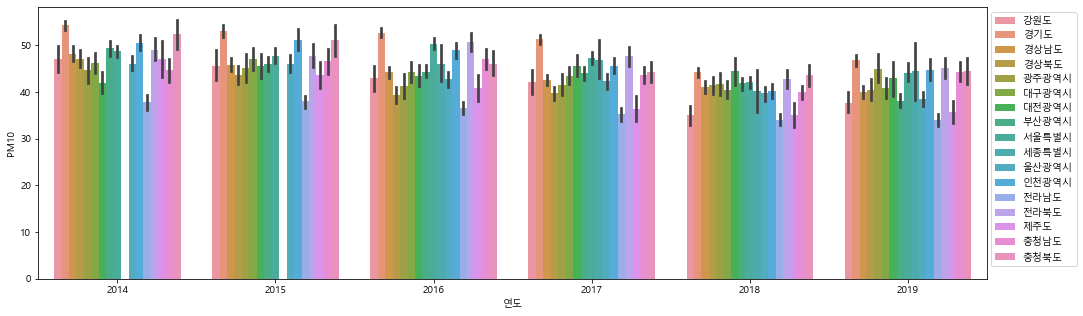

In [36]:
# 2014 ~ 2019 년 지역별 PM10 의 값

plt.figure(figsize= (17, 5))
sns.barplot(data = df, x = '연도', y = 'PM10', hue = '도')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))

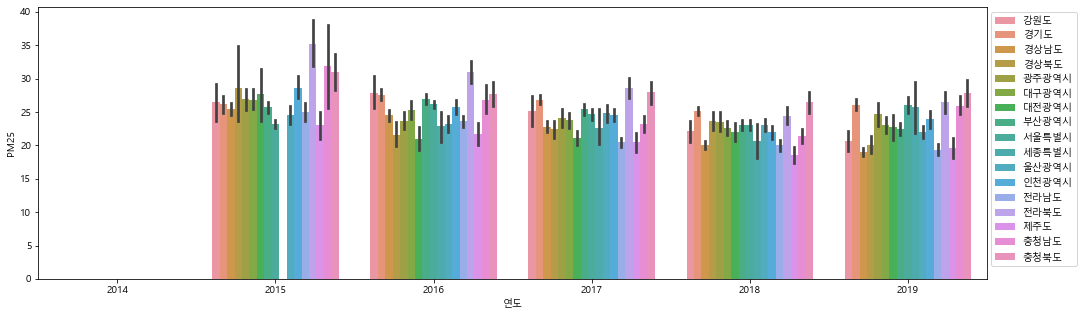

In [42]:
# 2014 ~ 2019 년 지역별 PM25 의 그래프 시각화

plt.figure(figsize= (17, 5))
sns.barplot(data = df, x = '연도', y = 'PM25', hue = '도')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))

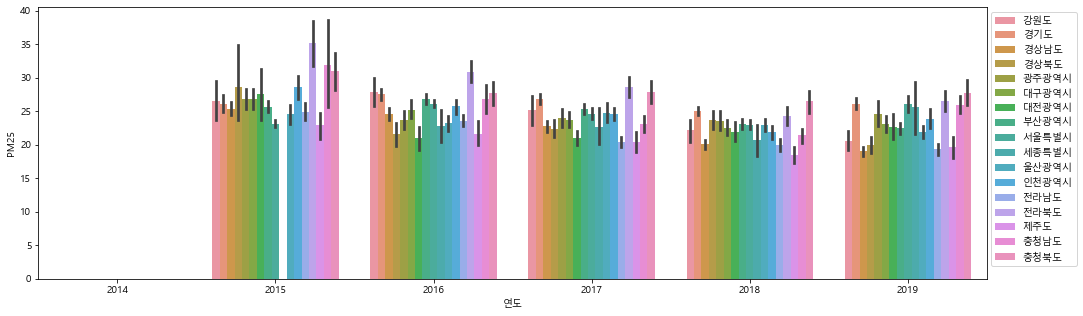

In [44]:
#

plt.figure(figsize= (17, 5))
sns.barplot(data = df, x = '연도', y = 'PM25', hue = '도')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))